In [1]:
import os
import threading
import time
import pickle
import random

from func_timeout import FunctionTimedOut, func_timeout

import numpy as np
import math
pi = math.pi
tan = math.tan
cos = math.cos
sin = math.sin

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

import queue
import collections.abc 
collections.Iterable=collections.abc.Iterable
import ifc

import ui
from ui.mobility import *
import ui.MarkerDetectionLocalization as mdl

from camera.frame_handler import FrameHandler
from detections.marker_detector import MarkerDetector
from system_config import *
from construction_config import *
import construct

HERE!!!

[FrameHandler] Connecting to ws://localhost:9090 ...
[FrameHandler] WebSocket connection opened.
[FrameHandler] Subscribed to topic: /image
Robot data listener started on tcp://127.0.0.1:5560...
Listening for tracking messages...
[FrameHandler] Connecting to ws://localhost:9090 ...
[FrameHandler] WebSocket connection opened.
[FrameHandler] Subscribed to topic: /image


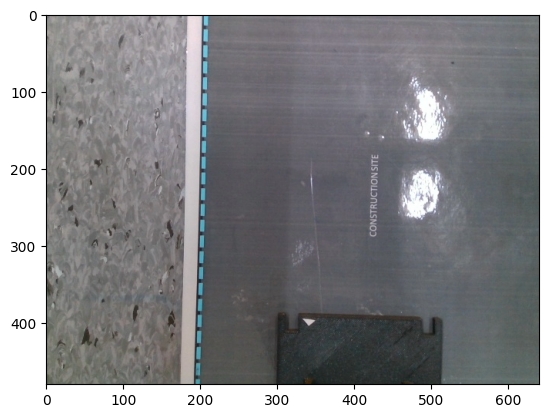

[FrameHandler] WebSocket error: Connection to remote host was lost.
[FrameHandler] WebSocket connection closed.
[FrameHandler] WebSocket error: Connection to remote host was lost.
[FrameHandler] WebSocket connection closed.


In [2]:
framehandler = ui.initializeUI()

In [3]:
script_args = ["_workingdata/IFC/Project1-06-UR3-v1.ifc", "--debug"]
IFC_sorted = ifc.IFC_loaded_sorted(*script_args)
pu_pos, ct_pos, st_pos = construct.scan_site(framehandler,True)

Using stub file for site scan


In [4]:
Element = 'Foundation'

if Element == 'Foundation':
    val = 11
    n_place = 0
if Element == 'Wall_1':
    val = 10
    n_place = 1
if Element == 'Floor_1':
    val = 12
    n_place = 2
if Element == 'Wall_2':
    val = 10
    n_place = 3
if Element == 'Floor_2':
    val = 12
    n_place = 4

place_coords = IFC_sorted[n_place,1:4] 

construct.pick(Element, pu_pos, framehandler) 
pos_placed = construct.place(ct_pos, place_coords,val,n_place)
pos_placed

Unable to find fiducial marker. Please check the setup.


{'coords': [0.635564693918283, 0.1463510899432043, 0.1920070339821965],
 'orientation': [[-0.9982369637758177,
   0.059300875611149065,
   -0.002523945995423],
  [0.05924371596280038, 0.9980690812618056, 0.018662560063792657],
  [0.003625778613734813, 0.018480129354705926, -0.9998226535483568]]}

In [8]:
moveJ(st_pos,ACC, VEL)

# Find and grab block of specified color
red_found, blue_found = construct.check_frame(bathroom_module_color_thresholds, bathroom_module_area_thresholds, framehandler)
print("Red found=", red_found)
print("Blue found=", blue_found)

answer = None# +ve is right
try:
    answer = func_timeout(5, lambda: input('Input color of toilet you want placed [r/b]:\n'))
    print(answer)
except FunctionTimedOut:
    print("Too slow, I will just pick a color for you!")
    answer = None

if answer is None:
    print("Too slow, I will just pick a color for you!")
elif answer == "r" and red_found:
    toilet_pos_grab = construct.grab_toilet(bathroom_module_color_thresholds["red"]["LB"], 
                                  bathroom_module_color_thresholds["red"]["UB"], 
                                  framehandler)
    toilet_found = True
elif answer == "b" and blue_found:
    toilet_pos_grab = construct.grab_toilet(bathroom_module_color_thresholds["blue"]["LB"], 
                                  bathroom_module_color_thresholds["blue"]["UB"], 
                                  framehandler)
    toilet_found = True

Red found= True
Blue found= True
r


In [9]:
BM_ID = 3

if BM_ID == 1:
    idx_element = 0
if BM_ID == 2:
    idx_element = 2
if BM_ID == 3:
    idx_element = 4

moveJ(ct_pos, ACC, VEL)

toilet_pos = construct.place_toilet(IFC_sorted, idx_element)

EE cords_1: 0.5110229828173359
z_move: 0.38597298281733594
Placing toilet on floor
EE cords_2: 0.5093158063390034
Going down by: 0.16597298281733594
EE cords: [0.6355971788854192, 0.20231615429230582, 0.41252653171925113]


In [9]:
gripper_width(100)

{'status': 'ack', 'result': 'Gripper width set to 100'}

In [8]:
set_orientation(orientations['ct'],ACC, VEL)

current_posj = mdl.get_joints()
current_posj[5] += pi/2
moveJ(current_posj, ACC, VEL)
gripper_width(0)

{'status': 'ack', 'result': 'Gripper width set to 0'}

In [8]:
translate((-0.01,0,0),0.2,0.2)

{'status': 'ack',
 'result': 'translate_tool executed with destination: [[-0.01, 0, 0], 0.2, 0.2]'}

In [23]:
mdl.get_EE_coords()

[0.6347121982824696, 0.20930029362851357, 0.3383943422082999]